In [1]:
# Get raw data
with open('input/10.txt', 'r') as f:
    rawinput = f.read().strip()

In [2]:
import numpy as np
import matplotlib.pyplot as plt

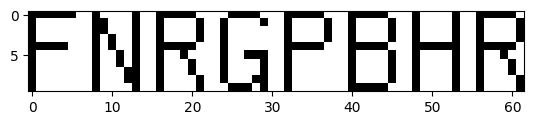

In [3]:
# Part 1
pos, vel = [np.flip(m, axis=1)
            for m in np.hsplit(np.array([[int(l) for k in j[1:] 
                                          for l in k[:k.index('>')].split(',')] 
                               for i in rawinput.split('\n') 
                               for j in [i.split('<')]]),
                               2)]
compare_ix = np.column_stack(((x:=np.repeat(np.arange(pos.shape[0]), pos.shape[0])), 
                              (y:=np.tile(np.arange(pos.shape[0]), pos.shape[0]))))[x<y]
slope = (vel[:, 0]/vel[:, 1])
icept = pos[:, 0] - slope * pos[:, 1]
filt = np.ptp(slope[compare_ix], axis=1) != 0
isectx = (np.sum(icept[compare_ix[filt]] * [[-1,1]], axis=1, keepdims=True) 
          / np.sum(slope[compare_ix[filt]] * [[1,-1]], axis=1, keepdims=True))
nsteps_est = ((isectx - pos[compare_ix[filt], 1]) / vel[compare_ix[filt], 1]).reshape(-1)

iter_from, iter_n = round(np.mean(nsteps_est)-2*(s:=np.std(nsteps_est))), round(4*s)

def get_message(pos, n):
    adj = np.sum(np.sum(np.sum(pos[compare_ix] * [[[-1],[1]]], axis=1) ** 2, axis=1) == 1).item()
    if n:
        return (pos, adj, n) if adj > (rr:=get_message(pos+vel, n-1))[1] else rr
    else:
        return (pos, adj, n)

def show_message(pos):
    grid = np.zeros(np.max((c:=pos - np.min(pos, axis=0)), axis=0)+1, dtype=int)
    grid[c[:,0],c[:,1]] = 1
    plt.imshow(grid, cmap='gray_r')
    plt.show()
    
message, _, nsteps = get_message(pos+iter_from*vel, iter_n)
show_message(message)

In [4]:
# Part 2
iter_from + nsteps

10511